In [2]:
#satisfaction vs addiction level

#box plots - device_type vs addiction level
#income vs addiction level
#self control vs addiction level
#watch reason vs addiction level

#Number of videos watched vs addiction level

# heatmap comparing effects of total time spent, scroll rate, frequency on addiction level and productivity loss
# stacked bar chart (watch reason vs. addiction level, platform type vs. productivity loss)
# watch time vs productivity loss
# frequency vs addiction level


In [ ]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np

import torch
from sklearn.cluster import KMeans

# Correlation Heat Map
file = pd.read_csv('Time_Wasters_on_Social_Media.csv')


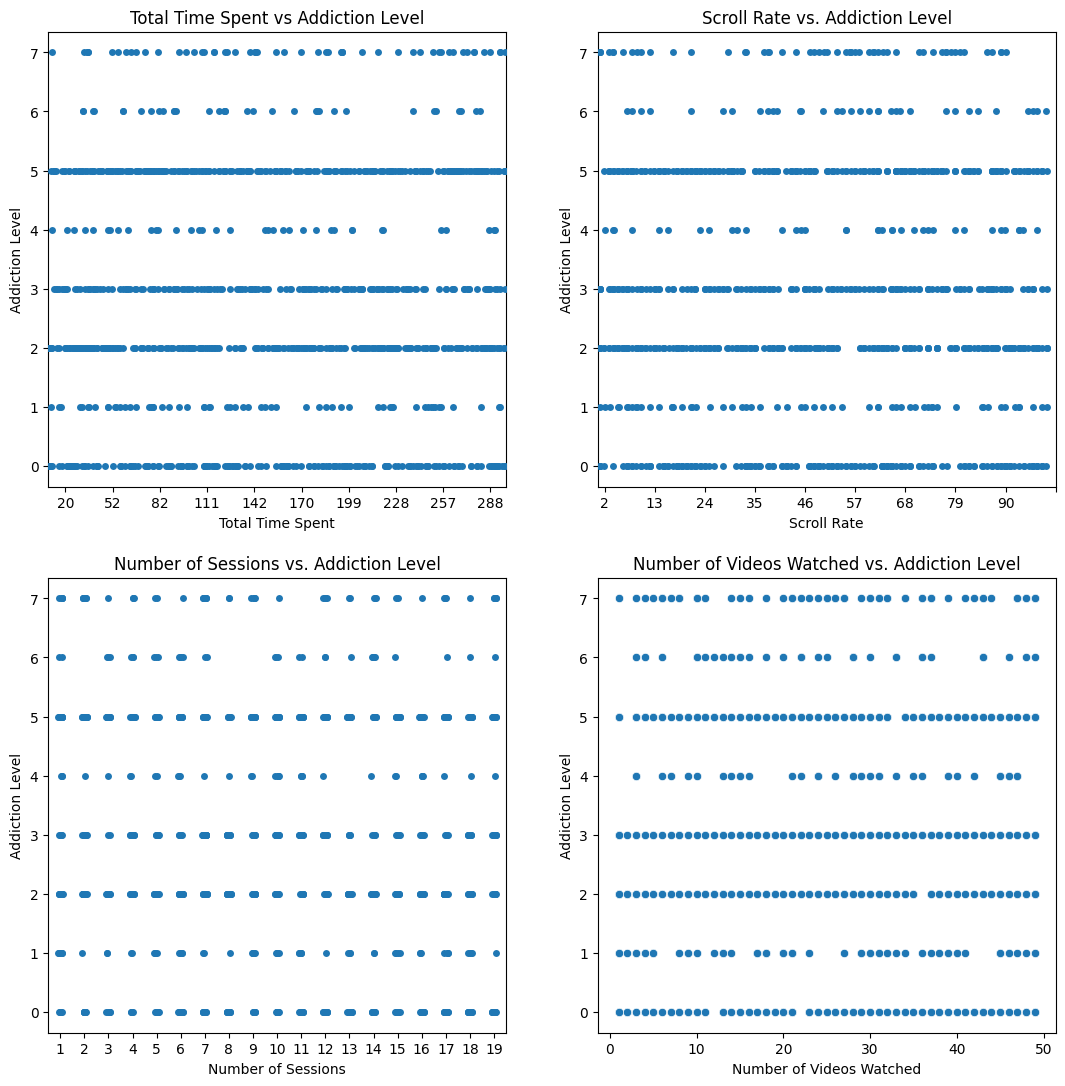

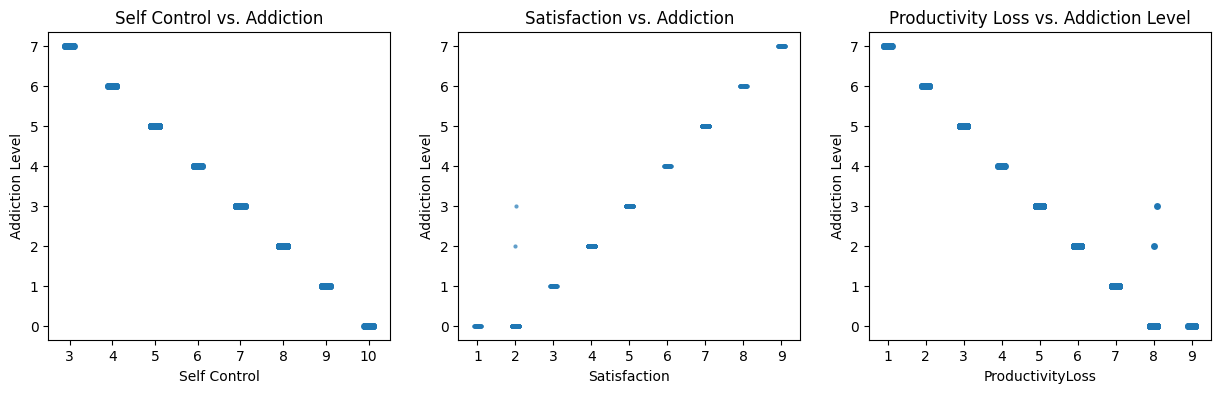

In [13]:
#Scatterplots - 
fig, axs = plt.subplots(2, 2, figsize=(13, 13))

sea.stripplot(data=file, x='Total Time Spent', y='Addiction Level', ax=axs[0, 0])
axs[0, 0].set_title("Total Time Spent vs Addiction Level")
axs[0, 0].set_xlabel("Total Time Spent")
axs[0, 0].set_xticks(np.linspace(10, 268, 10))
axs[0, 0].set_ylabel("Addiction Level")

sea.stripplot(data=file, x='Scroll Rate', y='Addiction Level', ax=axs[0, 1])
axs[0, 1].set_title("Scroll Rate vs. Addiction Level")
axs[0, 1].set_xlabel("Scroll Rate")
axs[0, 1].set_xticks(np.linspace(1, 100, 10))
axs[0, 1].set_ylabel("Addiction Level")


sea.stripplot(x=file['Number of Sessions'], y=file['Addiction Level'], ax=axs[1, 0])
axs[1, 0].set_title("Number of Sessions vs. Addiction Level")
axs[1, 0].set_xlabel("Number of Sessions")
axs[1, 0].set_ylabel("Addiction Level")


sea.scatterplot(data=file, x='Number of Videos Watched', y='Addiction Level', ax=axs[1,1])
axs[1, 1].set_title("Number of Videos Watched vs. Addiction Level")
axs[1, 1].set_xlabel("Number of Videos Watched")
axs[1, 1].set_ylabel("Addiction Level")

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sea.stripplot(data=file, x="Self Control", y="Addiction Level", ax=axs[0])
axs[0].set_title("Self Control vs. Addiction")

sea.stripplot(data=file, x='Satisfaction', y='Addiction Level', jitter=True, alpha=0.7, size=3, ax=axs[1])
axs[1].set_title("Satisfaction vs. Addiction")

sea.stripplot(data=file, x="ProductivityLoss", y="Addiction Level", ax=axs[2])
axs[2].set_title("Productivity Loss vs. Addiction Level")




plt.show()



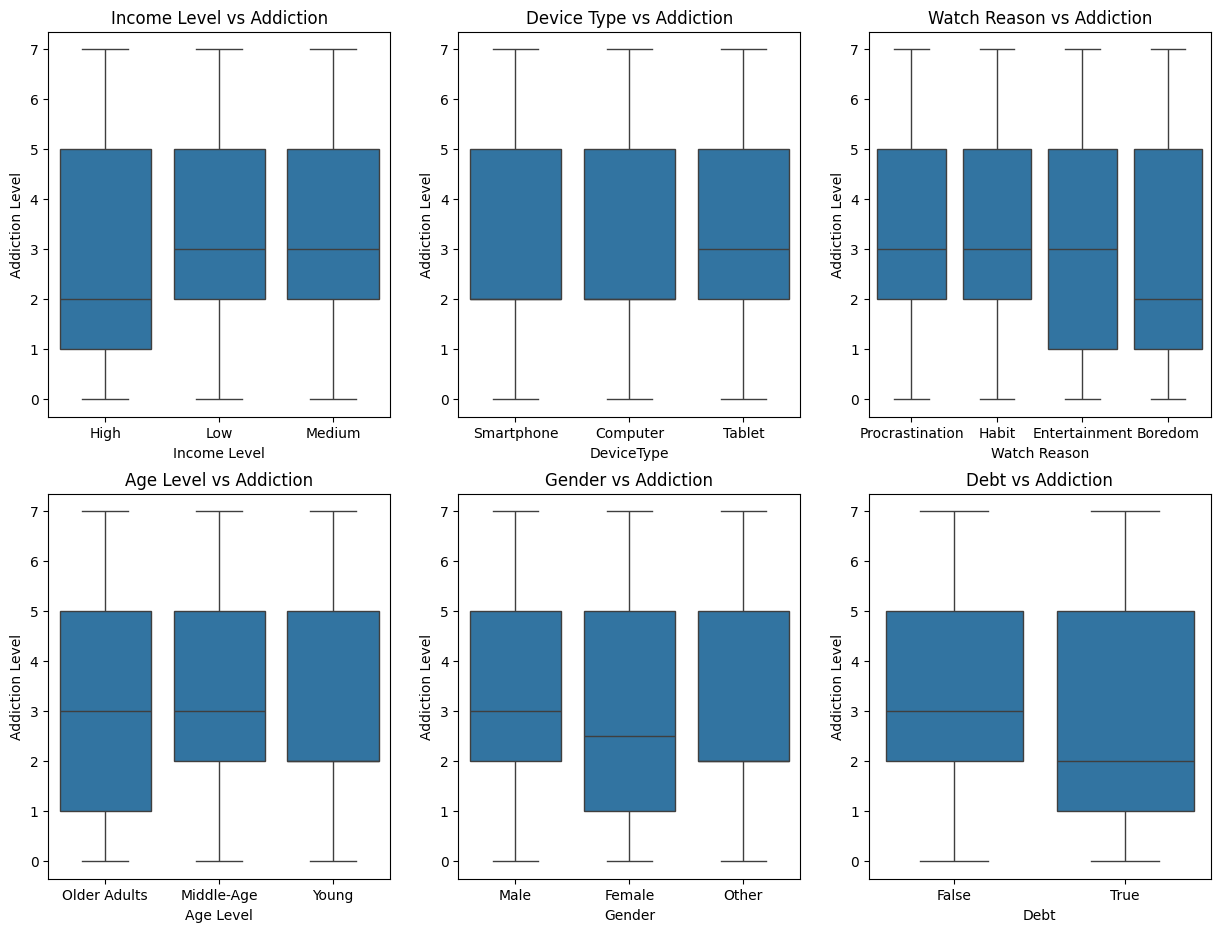

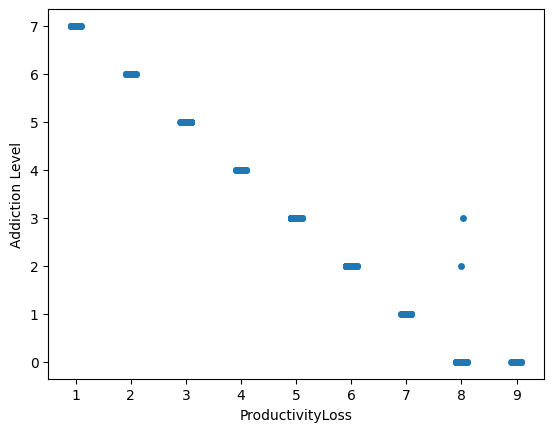

In [14]:
#Box Plots

fig, axs = plt.subplots(2, 3, figsize=(15,11))
def determine_level(income):
  if income <= 46000:
    return 'Low'
  elif income > 46000 and income < 73000:
    return 'Medium'
  else:
    return 'High'
file['Income Level'] = file['Income'].apply(determine_level)


sea.boxplot(data=file, x="Income Level", y="Addiction Level", ax=axs[0,0])
axs[0, 0].set_title("Income Level vs Addiction")



# sea.stripplot(data=file, x="Self Control", y="Addiction Level")



sea.boxplot(data=file, x="DeviceType", y="Addiction Level", ax=axs[0, 1])
axs[0, 1].set_title("Device Type vs Addiction")



sea.boxplot(data=file, x="Watch Reason", y="Addiction Level", ax=axs[0, 2])
axs[0, 2].set_title("Watch Reason vs Addiction")



def determine_age_level(age):
  if age <= 33:
    return 'Young'
  elif age > 33 and age < 50:
    return 'Middle-Age'
  else:
    return 'Older Adults'
file['Age Level'] = file['Age'].apply(determine_age_level)


sea.boxplot(data=file, x="Age Level", y="Addiction Level", ax=axs[1, 0])
axs[1, 0].set_title("Age Level vs Addiction")



sea.boxplot(data=file, x="Gender", y="Addiction Level", ax=axs[1, 1])
axs[1, 1].set_title("Gender vs Addiction")



# sea.boxplot(data=file, x="Location", y="Addiction Level", ax=axs[2, 0])



sea.boxplot(data=file, x="Debt", y="Addiction Level", ax=axs[1, 2])
axs[1, 2].set_title("Debt vs Addiction")

plt.figure()
sea.stripplot(data=file, x="ProductivityLoss", y="Addiction Level")
plt.show()



In [16]:
filtered_df = file[['Addiction Level', 'ProductivityLoss', 'Self Control']]
data_tensor = filtered_df.to_numpy()

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1)
kmeans.fit(data_tensor)

clusters=kmeans.cluster_centers_
print(clusters)


[[5.30594901 2.69405099 4.69405099]
 [0.25       7.90416667 9.75      ]
 [2.39066339 5.62162162 7.60933661]]
